### Import our libraries

In [4]:
import numpy as np
import pandas as pd
import os,sys,glob,math,pickle
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
np.set_printoptions(threshold=sys.maxsize)
from scipy.optimize import curve_fit
import math
import seaborn as sns
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

### Specify files and parameters

In [8]:
temperatures=("150", "200", "250", "300", "350", "400", "450", "500" ,"550", "600")

# Check that the files exist 

for temp in temperatures:
    
    txt=temp+"K.txt"
    fileok=os.path.isfile(txt)
    print("For " + temp + ": File exists? " +str(fileok))

    
ntemp=int(len(temperatures))
nskip = 9 
nframes = 181818
# nframes = 800000
natoms  = 2
tot_skip = int(nskip*nframes)

For 150: File exists? True
For 200: File exists? True
For 250: File exists? True
For 300: File exists? True
For 350: File exists? True
For 400: File exists? True
For 450: File exists? True
For 500: File exists? True
For 550: File exists? True
For 600: File exists? True


### Read text file made with other script

In [33]:
temp_1 = "150"
temp_2 = "500"

txt=temp_1+"K.txt"
traj = np.loadtxt(txt)
traj = traj.reshape((natoms, 3, nframes))

#txt=temp_2+"K.txt"
#traj = np.loadtxt(txt)
#traj= traj.reshape((natoms, 3, nframes))

### Do the ACF calculation here

In [31]:
index_b = 0
index_h=1

print(traj[:,2:,0:3])
acf = np.zeros((nframes,2))

[[[14.4  14.4  14.4 ]]

 [[ 5.14  5.14  5.14]]]


In [34]:
ix = 0

for iy in range(nframes):
    if iy == 0:
        print("program started: ", datetime.now())
    if iy == nframes-1:
        print("program ends: ", datetime.now())

    if ix != iy: 

        vec_ix = ((traj[index_h, 0, ix]-traj[index_b, 0, ix]), (traj[index_h, 1, ix]-traj[index_b, 1, ix]), (traj[index_h, 2, ix]-traj[index_b, 2, ix]) )
        vec_iy = ((traj[index_h, 0, iy]-traj[index_b, 0, iy]), (traj[index_h, 1, iy]-traj[index_b, 1, iy]), (traj[index_h, 2, iy]-traj[index_b, 2, iy]) )

        det_ix = np.sqrt((vec_ix[0])**2 + (vec_ix[1])**2 + (vec_ix[2])**2 )
        det_iy = np.sqrt((vec_iy[0])**2 + (vec_iy[1])**2 + (vec_iy[2])**2 )

        unit_ix = vec_ix/det_ix
        unit_iy = vec_iy/det_iy

        dot = np.dot(unit_ix,unit_iy)

        acf[iy,0] = dot

program started:  2023-02-24 09:50:26.436012
program ends:  2023-02-24 09:50:28.029249


### For plotting 

In [35]:
def set_fig():     
    
    plt.rc('xtick', labelsize=40) 
    plt.rc('ytick', labelsize=40) 
    plt.rc('axes', labelsize=60) # fontsize of the x and y labels
    
#    ax.xaxis.set_minor_locator(AutoMinorLocator(2))  
#    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    ax.tick_params(which='major', bottom=True, top=True, left=True, right=True, length=15, width=3, direction="in", pad=20)
    ax.tick_params(which='minor', bottom=True, top=True, left=True, right=True, length=10, width=3, direction="in", pad=20)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)

In [36]:
frames=np.arange(0,nframes,1)

frames=(frames*0.55)/1000

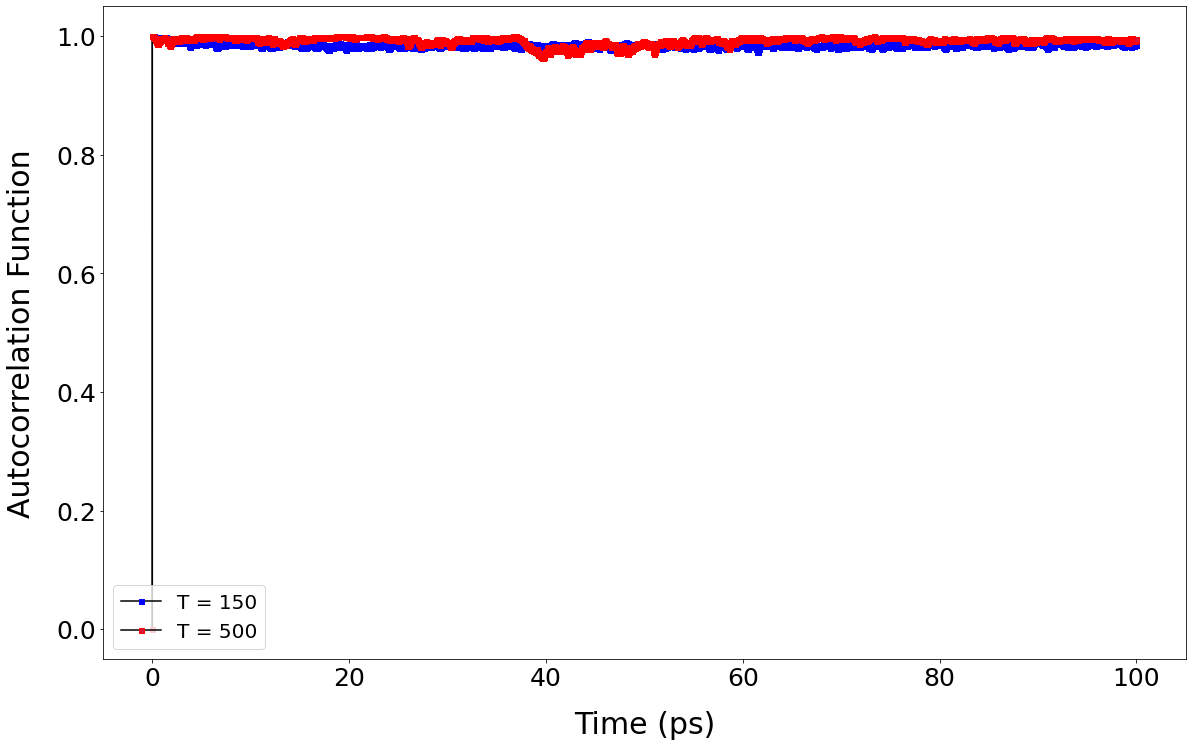

In [38]:
fig, ax = plt.subplots(figsize=(19.4, 12))
plt.xlabel('Time (ps)', labelpad=20, size=30)
plt.ylabel('Autocorrelation Function', labelpad=20,size=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(frames[:], acf[:,0], label='T = '+temp_1, color='black', linewidth=1.5,marker='s', markersize=5, markeredgewidth=1, markeredgecolor='blue', mfc='blue')
plt.plot(frames[:], acf[:,1], label='T = '+temp_2, color='black', linewidth=1.5,marker='s', markersize=5, markeredgewidth=1, markeredgecolor='red', mfc='crimson')

# plt.plot(frames, acf[1000,:], label='Ref = frame 1000', color='black', linewidth=1.5,marker='s', markersize=5, markeredgewidth=1, markeredgecolor='blue', mfc='blue')
# plt.plot(frames, acf[:,900], label='Total', color='black', linewidth=1.5,marker='s', markersize=5, markeredgewidth=1, markeredgecolor='green', mfc='crimson')

plt.legend(loc = 'lower left', markerscale = 1, fontsize = 20)
